In [482]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime as dt 
pd.set_option('max_colwidth', 400)

### Extract the Data

In [484]:
# Read the 'Imports by selected importing countries' data into a Pandas DataFrame
imports_df = pd.read_excel(r'cleaned_resources/Imports.xlsx', engine='openpyxl')
imports_df = imports_df.drop(labels=[36,37,38], axis =0)
imports_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Austria,1879.717004,2058.271005,2206.416005,1836.489002,1417.214004,1231.436001,1210.466006,1294.203405,1293.354106,...,1369.200299,1452.492905,1558.609366,1554.926951,1525.081080,1513.390285,1494.938560,1459.911532,1429.406831,1447.513664
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5923.729993,5828.442382,5668.231844,5502.143640,5211.749274,5533.514206,6052.170163,5677.379139,5742.253404,6198.896527
2,Belgium/Luxembourg,2014.954017,1746.225019,1827.851020,2063.260029,2262.473036,2401.498025,2525.823622,2544.379319,3579.677916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.182998,200.220001,182.231012,397.443006,462.668007,515.418008,272.159995,294.154003,342.122004,...,528.372082,481.510209,559.825066,609.486668,620.708966,681.756589,779.160013,706.882517,737.243983,784.896715
4,Croatia,NaN,NaN,168.190005,162.774001,193.450002,320.132006,321.835998,385.297004,339.051001,...,393.825469,390.873959,384.490360,412.849422,419.673550,437.201445,478.666658,439.074412,445.513611,466.417527
5,Cyprus,49.853999,53.926000,40.875999,77.412000,51.836001,43.769000,51.501999,41.340999,49.778999,...,76.728448,82.078754,83.877469,93.766183,94.388100,89.304875,93.153307,99.933874,133.179542,133.224874
6,Czechia,659.433000,525.274000,474.731003,514.277005,553.797003,553.196999,525.298002,560.225003,764.839002,...,950.721928,952.366595,1126.622901,1183.882242,1822.690779,2067.838569,1779.351245,1506.967219,1903.158902,1608.921470
7,Denmark,959.105004,982.757004,1061.623004,993.947000,1033.184003,877.159002,1005.999200,949.070500,1013.723201,...,1014.640895,908.869741,913.098994,921.178915,853.423879,840.777636,905.789619,852.193333,867.950523,907.935154
8,Estonia,NaN,NaN,16.378000,51.147998,83.097998,107.478002,116.918007,141.114997,134.658996,...,262.870187,166.855732,157.234790,156.214012,130.853713,126.200638,134.802638,133.148138,147.137781,147.848908
9,Finland,1095.140998,1033.066999,1055.361000,1301.455999,1361.003002,769.499000,992.273602,1185.521302,1167.935302,...,1273.743443,1286.515065,1237.833040,1275.467965,1213.055380,1320.802279,1388.966280,1360.023736,1284.822821,1515.473931


In [485]:
# Export the DataFrame as a CSV file. 
imports_df.to_csv(("Resources/imports.csv"))

TypeError: 'str' object is not callable

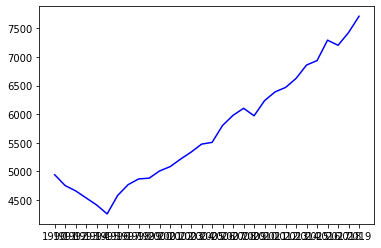

In [486]:
# Collect the mean coffee import volume by year
mean_coffee_import_volume = imports_df.mean()

# Collect the years where data was collected
years = mean_coffee_import_volume.keys()

# Plot the mean coffee import volume by year as a line chart
imports = plt.plot(years, mean_coffee_import_volume, color="blue", label="Coffee Import Average Volume per Year" )

# Create a legend for our chart 
plt.title("Coffee Import Average Volume per Year")
plt.legend(handles=[imports], loc ="best")

# Show the chart
plt.show()

In [488]:
# Read the 'Imports by selected importing countries' data into a Pandas DataFrame
non_member_imports_df = pd.read_excel(r'cleaned_resources/Non_member_imports.xlsx', engine='openpyxl')
non_member_imports_df = non_member_imports_df.drop(labels=[117,118,119,120], axis =0)
non_member_imports_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Algeria,1058.887000,1782.264000,862.266001,1470.025003,1697.675005,897.735004,1229.068010,1461.022998,475.395007,...,2021.446046,1942.379413,2116.646627,2124.726009,2153.974010,2159.120149,2323.129987,2190.164449,1819.132667,2259.791916
1,Benin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.780451,...,8.087116,12.717981,7.674313,6.309101,10.640358,15.768585,11.972798,15.569980,22.395893,12.339358
2,Botswana,12.974002,11.536001,18.099001,22.070001,20.424999,9.249002,26.427003,13.261001,29.537001,...,22.016983,23.347323,30.700374,22.126551,20.760403,32.991337,23.295213,21.017506,5.775654,17.567340
3,Burkina Faso,5.534002,7.053998,1.893003,7.071005,8.430995,13.124995,11.419004,12.010005,16.345000,...,60.256658,70.138735,65.029476,78.133678,82.762021,127.510239,91.639949,106.899850,126.316299,104.666004
4,Cabo Verde,1.670000,7.119000,17.500001,9.968002,8.026001,12.591000,13.053002,7.706001,8.742002,...,11.342303,10.558366,12.325581,11.682428,11.226479,11.107024,12.258770,13.529125,13.943134,11.236109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Caribbean,47.784349,57.591017,39.057151,44.724661,62.122496,44.729300,52.242344,45.369646,144.733657,...,202.928295,147.375668,210.182004,195.364533,236.915599,231.174237,217.271391,157.972680,163.212153,293.058424
113,Central America & Mexico,8.580003,9.423000,10.002004,9.618006,9.728003,13.570675,16.250335,18.840013,14.777020,...,5.081463,8.814085,16.651620,19.679115,27.207053,32.877515,28.383752,30.821057,36.435037,33.488454
114,Europe,3204.048014,1782.415015,713.143013,224.929694,305.575980,410.568032,609.887671,678.493350,1109.985708,...,3325.444294,3117.215035,3082.287341,3217.037954,3128.639898,2964.529388,3134.948997,3113.198254,3324.232528,3644.238903
115,North America,2253.478009,2356.146011,2271.012015,2488.917017,2827.129984,2509.892992,2763.455994,2863.888989,3410.340996,...,4365.799131,4542.108753,4443.529562,4519.733417,4981.025119,4697.865519,4872.775220,5098.463804,5113.961500,5420.401980


In [489]:
# Export the DataFrame as a CSV file. 
non_member_imports_df.to_csv(("Resources/non_member_imports.csv"))

In [490]:
# Read the 'Exports of all forms of coffee by all exporting countries' data into a Pandas DataFrame
exports_df = pd.read_excel(r'cleaned_resources/Exports_calendar_year.xlsx', engine='openpyxl')
exports_df = exports_df.drop(labels=[56], axis =0)
exports_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Angola,84.350000,70.501000,80.250000,38.878000,8.302000,40.559000,51.831000,50.494000,53.929000,...,4.370000,7.575000,8.375000,5.520000,9.375000,10.515000,10.945000,9.055000,9.323397,23.357178
1,Bolivia (Plurinational State of),156.442000,73.523000,96.204000,47.319000,84.321000,93.958000,123.445000,110.955000,97.039000,...,78.268006,74.308883,62.675780,54.850533,61.751267,30.280158,22.456342,26.119992,22.459634,20.341955
2,Brazil,16935.787600,21182.761402,18790.719202,17837.747999,17273.147600,14468.432201,15250.609002,16801.260005,18144.388334,...,33166.641590,33806.009328,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709
3,Burundi,584.773000,687.851000,645.858000,417.609000,507.803000,528.202000,224.076000,528.764000,373.841000,...,307.118958,217.845799,392.006917,194.715883,252.178000,230.188550,204.270831,168.876264,201.725236,292.887291
4,Cameroon,2611.259000,1752.179000,1645.851000,704.530000,545.889000,407.269000,563.549000,1368.030000,745.718000,...,793.845667,490.283067,621.812800,271.949217,375.033867,390.142717,281.128967,245.017117,287.415250,249.902400
5,Central African Republic,196.698000,140.950000,99.975000,137.197000,136.676000,231.542000,98.328000,202.778000,102.320000,...,95.194000,77.943000,77.692000,1.000000,75.027000,43.214000,80.018000,18.112667,38.528000,19.273333
6,Colombia,13943.870000,12599.184998,16564.370001,13568.362004,11768.089000,9814.197000,10588.430998,10918.863002,11259.928999,...,7821.634504,7733.625254,7170.203291,9669.907367,10954.408357,12716.384670,12831.390727,12984.595747,12807.972625,13672.225599
7,Congo,1.680000,0.924000,0.336000,0.504000,1.017000,19.149000,12.634000,2.670000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002037,0.000000,0.000000,0.013083,0.000555
8,Costa Rica,2265.644000,2399.640000,2431.340001,2363.920000,2104.968000,2067.011000,2430.134000,2099.239000,2044.558001,...,1199.982617,1243.059935,1373.667164,1343.951587,1208.918498,1128.190321,1006.928354,987.154641,1207.946296,1039.144361
9,Côte d'Ivoire,4282.866000,3804.734001,4546.368000,4033.107001,2443.993000,2493.946000,2750.602999,4712.982001,4365.288002,...,1912.053443,772.242167,1711.765617,1962.070767,1489.151150,1418.375167,1432.043600,854.620583,1522.457567,2104.257160


In [491]:
# Export the DataFrame as a CSV file. 
exports_df.to_csv(("Resources/exports.csv"))

In [492]:
# Read the 'Prices paid to growers in exporting countries' data into a Pandas DataFrame
prices_paid_to_growers_df = pd.read_excel(r'cleaned_resources/Prices_paid_to_growers.xlsx', engine='openpyxl')
prices_paid_to_growers_df = prices_paid_to_growers_df.drop(labels=[65,66,67,68,69,70,71,72,73,74,75,76], axis =0)
prices_paid_to_growers_df

,Calendar years,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Colombia,69.5230,67.1251,54.5709,50.1234,85.9942,99.6231,93.5556,133.1672,102.0805,...,180.5484,239.6763,166.6921,113.9086,159.7125,119.4042,123.5571,125.7612,113.5179,108.6836
1,Kenya,60.5721,50.6778,28.9495,47.6419,152.6058,140.1651,110.0360,183.9967,179.8972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tanzania,40.8183,49.5039,49.1581,38.2833,62.1553,86.7599,62.5345,118.5236,90.7025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bolivia (Plurinational State of),51.7802,52.4230,43.5276,27.3283,79.9150,76.9867,57.1799,100.0689,131.0938,...,NaN,NaN,225.6445,201.9723,239.2465,234.7937,271.7944,471.6169,455.1460,858.2941
4,Burundi,58.0195,55.0206,59.2340,58.2708,60.6823,56.6854,51.9721,52.7855,52.2187,...,85.6928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Thailand,37.7181,18.3728,20.3048,18.2894,18.7899,36.8393,43.3532,21.8500,27.3262,...,84.5002,107.6442,103.0864,103.7722,92.0430,96.5325,NaN,NaN,NaN,NaN
61,Togo,29.2306,28.6435,29.8298,22.6435,25.9924,61.4095,62.5798,44.8863,49.9303,...,42.3550,74.1430,68.4979,66.5629,59.8826,59.5525,65.7322,68.7301,70.9276,70.5011
62,Trinidad & Tobago,62.5882,62.5882,69.2941,72.1989,64.1384,63.8905,63.2496,60.6263,60.2943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Uganda,7.5418,11.8428,8.9537,11.7661,41.6628,59.7927,37.4363,41.6871,40.0205,...,55.6110,73.5356,71.8047,67.7053,70.1796,60.2159,59.4124,63.9549,57.2308,54.6081


In [493]:
# Export the DataFrame as a CSV file. 
prices_paid_to_growers_df.to_csv(("Resources/prices_paid_to_growers.csv"))

In [494]:
# Read the 'Retail prices of roasted coffee in selected importing countries' data into a Pandas DataFrame
retail_prices_df = pd.read_excel(r'cleaned_resources/Retail_prices.xlsx', engine='openpyxl')
retail_prices_df = retail_prices_df.drop(labels=[28,29,30, 31,32,33,34,35,36,37,38,39], axis =0)
retail_prices_df

,Calendar years,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Austria,4.90,4.57,4.99,4.97,4.58,5.18,5.42,4.37,3.97,...,6.69,8.32,8.38,8.62,8.63,7.44,5.64,6.22,6.63,6.166070
1,Belgium,3.27,2.92,3.05,2.78,3.42,4.88,4.04,3.98,4.19,...,5.18,6.48,6.20,6.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.62,4.16,3.44,3.59,3.75,3.45,3.79,4.64,4.58,4.208544
3,Cyprus,2.83,2.80,2.87,2.60,3.18,4.26,4.13,4.04,4.61,...,5.21,6.06,6.36,6.47,6.48,5.30,5.30,5.50,5.79,5.393971
4,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.31,5.10,...,5.01,6.58,7.13,7.00,6.61,5.75,6.14,6.58,7.27,6.697826
5,Denmark,3.81,3.67,3.79,3.48,4.45,5.57,4.81,4.96,4.92,...,5.44,6.92,6.72,6.36,6.43,5.85,4.94,5.03,5.30,4.853482
6,Finland,2.98,2.72,2.46,1.94,2.73,3.97,3.22,3.50,3.42,...,3.69,5.36,4.80,4.29,4.31,3.90,3.67,4.10,4.24,4.004646
7,France,3.73,3.43,2.31,2.03,2.40,3.69,3.30,2.76,2.78,...,3.62,4.13,3.92,3.92,3.77,3.11,3.26,3.40,3.68,3.474105
8,Germany,3.99,3.84,4.00,3.62,4.18,5.02,4.17,4.03,4.04,...,4.76,5.10,4.74,5.65,5.72,5.18,5.05,5.34,5.49,NaN
9,Hungary,NaN,NaN,NaN,NaN,3.88,5.04,4.62,3.89,3.75,...,5.02,6.08,6.07,5.42,4.86,4.16,4.31,4.83,4.83,4.348879


In [495]:
# Export the DataFrame as a CSV file. 
retail_prices_df.to_csv(("Resources/retail_prices.csv"))

### Code blocks below were originally used to clean data then I was encouraged to just clean in excel.

In [ ]:
# imports_df = imports_df.drop(labels=[0,1,3,33,41,43,44], axis =0)
# imports_df


In [ ]:
# header = imports_df.iloc[0]
# imports_df = imports_df[1:]
# imports_df.columns = header
# imports_df=imports_df.rename(columns={"Calendar years":"Country"})
# # imports_df=imports_df.set_index('Country')
# imports_df

In [ ]:
# imports_df.rename(columns = {"1990.0":"1990", "1991.0":"1991", "1992.0":"1992", "1993.0":"1993", "1994.0":"1994", "1995.0":"1995", "1996.0":"1996", "1997.0":"1997", "1998.0":"1998", "1999.0":"1999", "2000.0":"2000", "2001.0":"2001", "2002.0":"2002", "2003.0":"2003", "2004.0":"2004", "2005.0":"2005", "2006.0":"2006", "2007.0":"2007", "2008.0":"2008", "2009.0":"2009", "2010.0":"2010", "2011.0":"2011", "2012.0":"2012", "2013.0":"2013", "2014.0":"2014", "2015.0":"2015", "2016.0":"2016", "2017.0":"2017", "2018.0":"2018", "2019.0":"2019"}, inplace=True)
# imports_df

In [ ]:
# imports_df.info()

In [ ]:
# imports_df.describe()

In [ ]:
# # Collect the mean coffee import volume by year
# mean_coffee_import_volume = imports_df.mean()

# # Collect the years where data was collected
# years = mean_coffee_import_volume.keys()

In [ ]:
# # Plot the mean coffee import volume by year as a line chart
# imports = plt.plot(years, mean_coffee_import_volume, color="blue", label="Coffee Import Average Volume per Year" )


# # Create a legend for our chart
# plt.legend(handles=[imports], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# imports_df = imports_df.T
# imports_df

In [ ]:
# imports_df[1:].plot(legend=True)
# plt.show

In [ ]:
# imports_df.loc[:0,imports_df.columns != "Country"]

In [ ]:
# imports_df.loc[:0] = imports_df.loc[:0].replace({"1990.0":"1990", "1991.0":"1991", "1992.0":"1992", "1993.0":"1993", "1994.0":"1994", "1995.0":"1995", "1996.0":"1996", "1997.0":"1997", "1998.0":"1998", "1999.0":"1999", "2000.0":"2000", "2001.0":"2001", "2002.0":"2002", "2003.0":"2003", "2004.0":"2004", "2005.0":"2005", "2006.0":"2006", "2007.0":"2007", "2008.0":"2008", "2009.0":"2009", "2010.0":"2010", "2011.0":"2011", "2012.0":"2012", "2013.0":"2013", "2014.0":"2014", "2015.0":"2015", "2016.0":"2016", "2017.0":"2017", "2018.0":"2018", "2019.0":"2019"})
# imports_df

In [ ]:
# imports_df.loc[:0]=pd.to_datetime(imports_df.loc[:0], format = '%Y')
# imports_df


In [ ]:
# Read the 'Imports by selected importing countries' data into a Pandas DataFrame
# non_member_imports_df = pd.read_excel(r'Resources/Non_member_imports.xlsx', engine='openpyxl')

In [ ]:
# non_member_imports_df = non_member_imports_df.drop(labels=[0,1,3,32,80,97,102,118,121,127], axis =0)
# non_member_imports_df=non_member_imports_df.drop(labels=range(129,139), axis=0)
# non_member_imports_df

In [ ]:
# header = non_member_imports_df.iloc[0]
# non_member_imports_df = non_member_imports_df[1:]
# non_member_imports_df.columns = header
# non_member_imports_df=non_member_imports_df.rename(columns={"Calendar years":"Country"})
# # non_member_imports_df=non_member_imports_df.set_index('Country')
# non_member_imports_df

In [ ]:
# non_member_imports_df.info()

In [ ]:
# non_member_imports_df.describe()

In [ ]:
# Collect the mean coffee import volume by year
mean_coffee_non_member_import_volume = non_member_imports_df.mean()

# Collect the years where data was collected
years = mean_coffee_non_member_import_volume.keys()

In [ ]:
# Plot the mean coffee import non-member volume by year as a line chart
imports_non_member = plt.plot(years, mean_coffee_non_member_import_volume, color="green", label="Coffee Import Non_Member Average Volume per Year" )


# Create a legend for our chart
plt.legend(handles=[imports_non_member], loc ="best")

# Show the chart
plt.show()

In [ ]:
non_member_imports_df = non_member_imports_df.T
non_member_imports_df

In [ ]:
non_member_imports_df[1:].plot(legend=True)
plt.show

In [ ]:
# Read the 'Exports of all forms of coffee by all exporting countries' data into a Pandas DataFrame
exports_df = pd.read_excel(r'Resources/Exports_calendar_year.xlsx', engine='openpyxl')


In [ ]:
exports_df=exports_df.drop(labels=[0,1,58,60], axis =0)
exports_df

In [ ]:
header = exports_df.iloc[0]
exports_df = exports_df[1:]
exports_df.columns = header
exports_df=exports_df.rename(columns={"Calendar years":"Country"})
# exports_df=exports_df.set_index('Country')
exports_df

In [ ]:
exports_df.info()

In [ ]:
exports_df.describe()

In [ ]:
# Collect the mean coffee export volume by year
export_volume = exports_df.mean()

# Collect the years where data was collected
years = export_volume.keys()

In [ ]:
# Plot the mean coffee export volume by year as a line chart
exports = plt.plot(years, export_volume, color="green", label="Coffee Export Volume per Year" )


# Create a legend for our chart
plt.legend(handles=[exports], loc ="best")

# Show the chart
plt.show()

In [ ]:
exports_df = exports_df.T
exports_df

In [ ]:
exports_df[1:].plot(legend=True)
plt.show

In [ ]:
# Read the 'Prices paid to growers in exporting countries' data into a Pandas DataFrame
prices_paid_to_growers_df = pd.read_excel(r'Resources/Prices_paid_to_growers.xlsx', engine='openpyxl')


In [ ]:
prices_paid_to_growers_df=prices_paid_to_growers_df.drop(labels=[0,1,3,8,37,46], axis =0)
prices_paid_to_growers_df=prices_paid_to_growers_df.drop(labels=range(76,103), axis=0)
prices_paid_to_growers_df

In [ ]:
header = prices_paid_to_growers_df.iloc[0]
prices_paid_to_growers_df = prices_paid_to_growers_df[1:]
prices_paid_to_growers_df.columns = header
prices_paid_to_growers_df=prices_paid_to_growers_df.rename(columns={"Calendar years":"Country"})
# prices_paid_to_growers_df=prices_paid_to_growers_df.set_index('Country')
prices_paid_to_growers_df

In [ ]:
prices_paid_to_growers_df.info()

In [ ]:
prices_paid_to_growers_df.describe()

In [ ]:
# Collect the prices paid to growers mean by year
prices_paid_to_growers = prices_paid_to_growers_df.mean()

# Collect the years where data was collected
years = prices_paid_to_growers.keys()

In [ ]:
# Plot the prices paid to growers mean by year as a line chart
growers_prices = plt.plot(years, prices_paid_to_growers, color="green", label="Prices Paid to Growers Mean by Year")


# Create a legend for our chart
plt.legend(handles=[growers_prices], loc ="best")

# Show the chart
plt.show()

In [ ]:
prices_paid_to_growers_df = prices_paid_to_growers_df.T
prices_paid_to_growers_df

In [ ]:
prices_paid_to_growers_df[1:].plot
plt.show

In [ ]:
# Read the 'Retail prices of roasted coffee in selected importing countries' data into a Pandas DataFrame
retail_prices_df = pd.read_excel(r'Resources/Retail_prices.xlsx', engine='openpyxl')


In [ ]:
retail_prices_df=retail_prices_df.drop(labels=[0,1,3,27], axis =0)
retail_prices_df=retail_prices_df.drop(labels=range(34,74), axis=0)
retail_prices_df

In [ ]:
header = retail_prices_df.iloc[0]
retail_prices_df = retail_prices_df[1:]
retail_prices_df.columns = header
retail_prices_df=retail_prices_df.rename(columns={"Calendar years":"Country"})
# retail_prices_df=retail_prices_df.set_index('Country')
retail_prices_df

In [ ]:
retail_prices_df.info()

In [ ]:
retail_prices_df.describe()

In [ ]:
# Collect the retail prices mean by year
retail_prices = retail_prices_df.mean()

# Collect the years where data was collected
years = retail_prices.keys()

In [ ]:
# Plot the retail prices mean by year as a line chart
retail = plt.plot(years, retail_prices, color="green", label="Retail Prices Mean by Year")


# Create a legend for our chart
plt.legend(handles=[retail], loc ="best")

# Show the chart
plt.show()

In [ ]:
retail_prices_df = retail_prices_df.T
retail_prices_df

In [ ]:
retail_prices_df[1:].plot
plt.show